👩🏻‍💻 Juliana Ferreira

Analista de Dados

Transformando dados em decisões estratégicas.
 ---
🔎 Desafio

Identificar padrões e fatores associados ao cancelamento de clientes para apoiar estratégias de retenção e redução de churn.
---

🛠️ Ferramentas Utilizadas

Python

Pandas

NumPy

Matplotlib

Seaborn

Google Colab---

📌 Etapas do Projeto

Coleta e Extração de Dados (API)

Tratamento e Padronização (ETL)

Análise Descritiva

Análise Exploratória de Dados (EDA)

Geração de Insights Estratégicos---

📈 Contexto do Problema

A Telecom X enfrenta um alto índice de cancelamento de clientes.
Compreender os fatores associados ao churn é essencial para reduzir perdas financeiras e fortalecer estratégias de fidelização.---



In [51]:
import requests
import pandas as pd
url= "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()
df= pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [52]:
from pandas.core.reshape import concat
import pandas as pd

# Check if the 'customer' column is already processed/dropped.
# If it's missing, reload the DataFrame from the original 'data' to ensure 'customer' column is present.
if 'customer' not in df.columns:
    df = pd.DataFrame(data)

customer_df = pd.json_normalize(df['customer'])
df = pd.concat([df.drop('customer', axis=1), customer_df], axis=1)

In [53]:
df.head()

,customerID,Churn,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure
0,0002-ORFBO,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9
1,0003-MKNFE,No,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9
2,0004-TLHLJ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4
3,0011-IGKFF,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13
4,0013-EXCHZ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3


In [54]:
df.head()
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7267 non-null   object
 1   Churn          7267 non-null   object
 2   phone          7267 non-null   object
 3   internet       7267 non-null   object
 4   account        7267 non-null   object
 5   gender         7267 non-null   object
 6   SeniorCitizen  7267 non-null   int64 
 7   Partner        7267 non-null   object
 8   Dependents     7267 non-null   object
 9   tenure         7267 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 567.9+ KB


In [55]:
df.isnull().sum()



,0
customerID,0
Churn,0
phone,0
internet,0
account,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0


In [56]:
(df.isnull().sum() / len(df)) * 100


,0
customerID,0.0
Churn,0.0
phone,0.0
internet,0.0
account,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0


### Processing Nested Dictionary Columns

To ensure all columns are suitable for analysis and to avoid issues with unhashable types when checking for duplicates, we will flatten the 'phone', 'internet', and 'account' columns. Each of these columns currently holds a dictionary, which we will expand into new columns in the main DataFrame.

In [57]:
# Function to normalize and concatenate a nested column
def normalize_and_concat(dataframe, column_name):
    if column_name in dataframe.columns:
        normalized_df = pd.json_normalize(dataframe[column_name])
        dataframe = pd.concat([dataframe.drop(column_name, axis=1), normalized_df], axis=1)
    return dataframe

# Process 'phone' column
df = normalize_and_concat(df, 'phone')

# Process 'internet' column
df = normalize_and_concat(df, 'internet')

# Process 'account' column
df = normalize_and_concat(df, 'account')

display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Checking for Duplicates after Flattening

Now that all nested columns have been flattened, we can re-run the duplicate check on the DataFrame.

In [58]:
df.duplicated().sum()

np.int64(0)

In [59]:
df.dtypes


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [60]:
for col in df.select_dtypes(include='object'):
    print(col)
    print(df[col].unique())
    print("------")


customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------
Churn
['No' 'Yes' '']
------
gender
['Female' 'Male']
------
Partner
['Yes' 'No']
------
Dependents
['Yes' 'No']
------
PhoneService
['Yes' 'No']
------
MultipleLines
['No' 'Yes' 'No phone service']
------
InternetService
['DSL' 'Fiber optic' 'No']
------
OnlineSecurity
['No' 'Yes' 'No internet service']
------
OnlineBackup
['Yes' 'No' 'No internet service']
------
DeviceProtection
['No' 'Yes' 'No internet service']
------
TechSupport
['Yes' 'No' 'No internet service']
------
StreamingTV
['Yes' 'No' 'No internet service']
------
StreamingMovies
['No' 'Yes' 'No internet service']
------
Contract
['One year' 'Month-to-month' 'Two year']
------
PaperlessBilling
['Yes' 'No']
------
PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
------
Charges.Total
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']
------


In [61]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [62]:
df['Contas_Diarias'] = df['Charges.Monthly'] / 30

In [63]:
df[['Charges.Monthly', 'Contas_Diarias']].head()

,Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [64]:
df['Contas_Diarias'] = (df['Charges.Monthly'] / 30).round(2)

In [65]:
df.groupby('Churn')['Contas_Diarias'].mean()


,Contas_Diarias
Churn,
,2.113795
No,2.042080
Yes,2.481450


In [66]:
binary_cols = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [67]:
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip().str.lower()


In [68]:
df.rename(columns={
    'MonthlyCharges': 'Valor_Mensal',
    'TotalCharges': 'Valor_Total'
}, inplace=True)


In [69]:
#Nesta fase de padronização, foram convertidas variáveis texto como “Yes/No” para binário (1/0), garantindo que os dados estejam prontos para cálculos numéricos e visualizações.
#Categorias textuais foram padronizadas para letras minúsculas sem espaços extras para evitar inconsistências durante análise.

In [90]:
df.rename(columns={
    'customerID': 'ID_Cliente',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Possui_Parceiro',
    'Dependents': 'Possui_Dependentes',
    'tenure': 'Tempo_Contrato',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Servico_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Valor_Mensal', # Corrected column name
    'Charges.Total': 'Valor_Total',    # Corrected column name
    'Churn': 'Cancelou'
}, inplace=True)

In [71]:
(df.std(numeric_only=True) / df.mean(numeric_only=True)) * 100


,0
Cancelou,166.394664
Idoso,226.908851
Possui_Parceiro,103.238025
Possui_Dependentes,152.718000
Tempo_Contrato,75.964245
Servico_Telefone,32.831269
Fatura_Digital,82.811964
Valor_Mensal,46.553656
Contas_Diarias,46.558688


In [72]:
df['Cancelou'].value_counts()


,count
Cancelou,
0.0,5174
1.0,1869


In [73]:
df['Cancelou'].value_counts(normalize=True) * 100


,proportion
Cancelou,
0.0,73.463013
1.0,26.536987


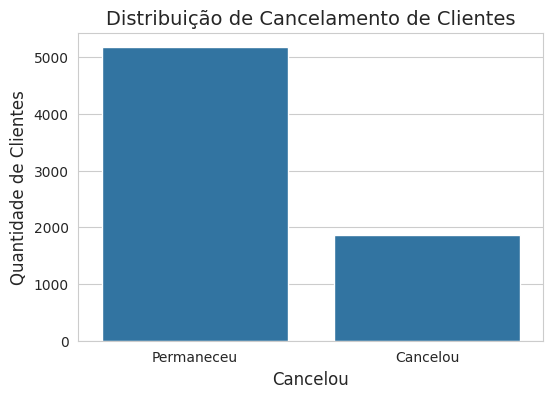

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Cancelou', data=df)

plt.title('Distribuição de Cancelamento de Clientes')
plt.xlabel('Cancelou')
plt.ylabel('Quantidade de Clientes')
plt.xticks([0,1], ['Permaneceu', 'Cancelou'])  # se for binário
plt.show()


In [75]:
# O gráfico acima apresenta a distribuição dos clientes que permaneceram
# na empresa em comparação aos que cancelaram o serviço.
# Aproximadamente 26% dos clientes cancelaram, indicando
# uma taxa relevante de evasão.


Análise de Cancelamento por Variáveis Categóricas

Nesta etapa, foi analisada a distribuição da variável Cancelou em relação às principais variáveis categóricas da base de dados, como Gênero, Tipo de Contrato e Método de Pagamento.

O objetivo dessa análise é identificar possíveis padrões comportamentais associados à evasão de clientes.

Observa-se que determinadas categorias apresentam maior proporção de cancelamento quando comparadas às demais. Em especial, clientes com contratos de menor duração tendem a apresentar maior índice de evasão, indicando menor fidelização. Além disso, o método de pagamento pode influenciar o comportamento de cancelamento, sugerindo possível relação entre forma de cobrança e satisfação do cliente.

Esses padrões indicam que o churn não ocorre de maneira aleatória, mas está associado a características específicas do perfil do cliente. Dessa forma, a empresa pode utilizar essas informações para desenvolver estratégias direcionadas de retenção, como incentivos para contratos de longo prazo ou revisão das políticas de cobrança.

In [76]:
pd.crosstab(df['Tipo_Contrato'], df['Cancelou'], normalize='index') * 100


Cancelou,0.0,1.0
Tipo_Contrato,,
month-to-month,57.290323,42.709677
one year,88.730482,11.269518
two year,97.168142,2.831858


Clientes que cancelam têm menor tempo de contrato?

Eles pagam mais?

O valor total acumulado influencia?

In [77]:
df['Valor_Total'] = pd.to_numeric(df['Valor_Total'], errors='coerce')
df.groupby('Cancelou')[['Tempo_Contrato', 'Valor_Mensal', 'Valor_Total']].mean()

,Tempo_Contrato,Valor_Mensal,Valor_Total
Cancelou,,,
0.0,37.569965,61.265124,2555.344141
1.0,17.979133,74.441332,1531.796094


/tmp/ipython-input-1230032572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


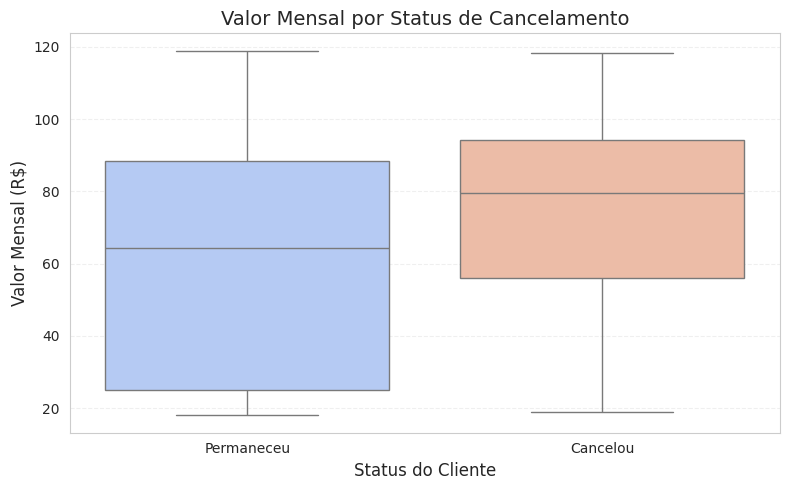

In [78]:
plt.figure(figsize=(8,5))

sns.boxplot(
    x='Cancelou',
    y='Valor_Mensal',
    data=df,
    palette='coolwarm'
)

plt.title('Valor Mensal por Status de Cancelamento', fontsize=14)
plt.xlabel('Status do Cliente')
plt.ylabel('Valor Mensal (R$)')
plt.xticks([0,1], ['Permaneceu', 'Cancelou'])

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


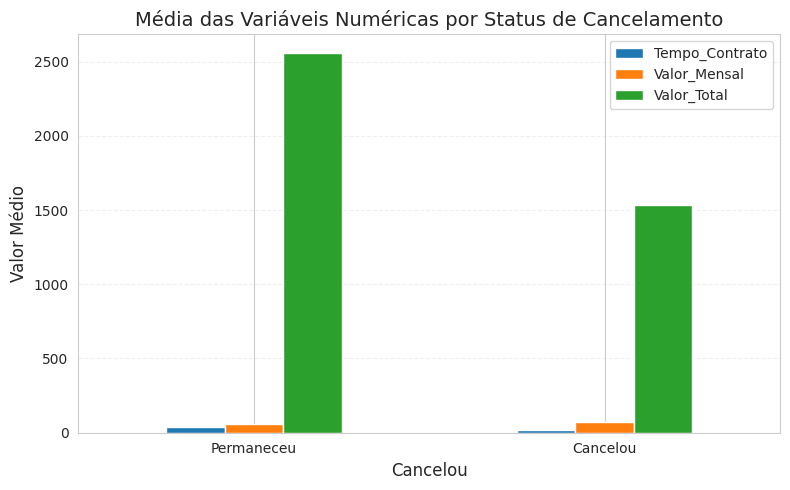

In [79]:
media = df.groupby('Cancelou')[['Tempo_Contrato','Valor_Mensal','Valor_Total']].mean().reset_index()

media['Cancelou'] = media['Cancelou'].map({0:'Permaneceu', 1:'Cancelou'})

media.set_index('Cancelou').plot(
    kind='bar',
    figsize=(8,5)
)

plt.title('Média das Variáveis Numéricas por Status de Cancelamento')
plt.ylabel('Valor Médio')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


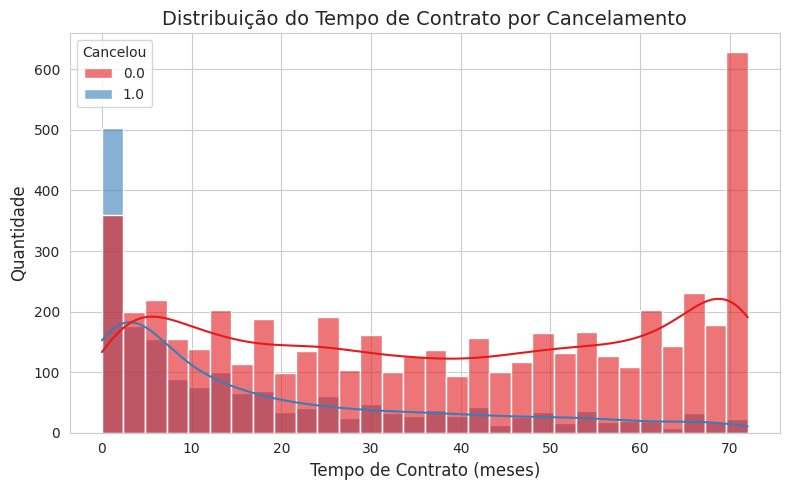

In [80]:
plt.figure(figsize=(8,5))

sns.histplot(
    data=df,
    x='Tempo_Contrato',
    hue='Cancelou',
    bins=30,
    kde=True,
    palette='Set1',
    alpha=0.6
)

plt.title('Distribuição do Tempo de Contrato por Cancelamento')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo geral
sns.set_style("whitegrid")

# Paleta padrão do projeto
CORES = ['#1f77b4', '#ff7f0e']  # Azul (permaneceu) e Laranja (cancelou)

# Configuração padrão de tamanho
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10


In [82]:
def grafico_proporcao():
    proporcao = df['Cancelou'].value_counts(normalize=True) * 100

    plt.figure()
    proporcao.plot(kind='bar', color=CORES)

    plt.title('Proporção de Cancelamento')
    plt.ylabel('Percentual (%)')
    plt.xticks([0,1], ['Permaneceu', 'Cancelou'], rotation=0)
    plt.tight_layout()
    plt.show()


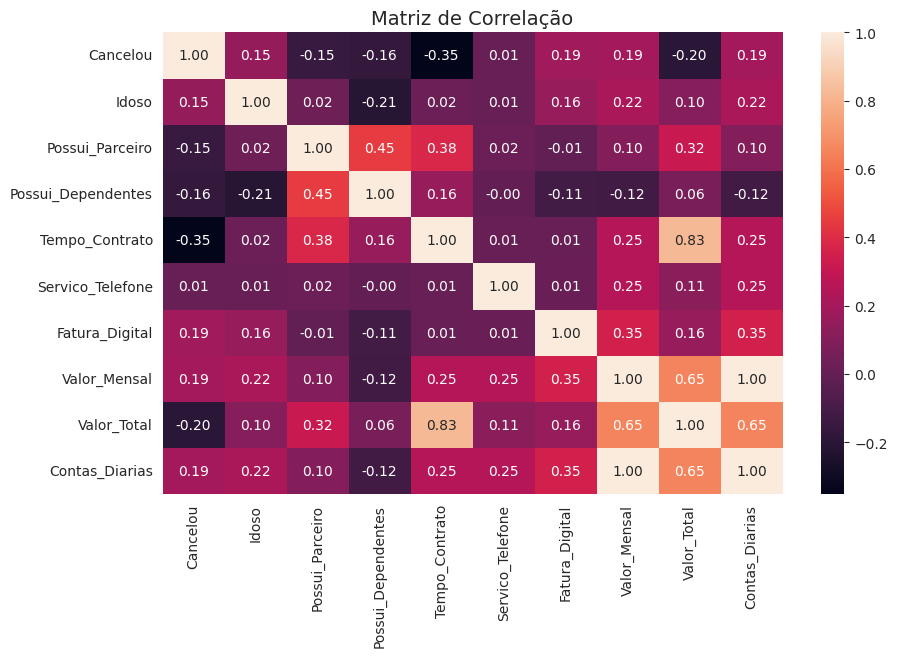

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar apenas colunas numéricas
df_numerico = df.select_dtypes(include=['int64', 'float64'])

# Calcular correlação
correlacao = df_numerico.corr()

# Exibir matriz de correlação
plt.figure(figsize=(10,6))
sns.heatmap(correlacao, annot=True, fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


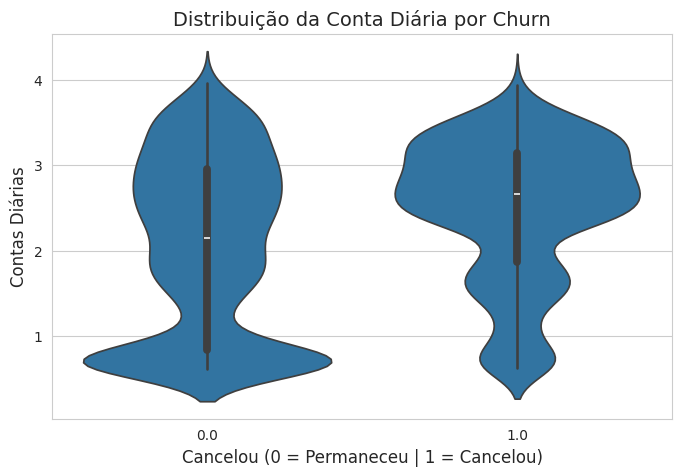

In [89]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Cancelou', y='Contas_Diarias', data=df)

plt.title("Distribuição da Conta Diária por Churn")
plt.xlabel("Cancelou (0 = Permaneceu | 1 = Cancelou)")
plt.ylabel("Contas Diárias")

plt.show()

A análise da distribuição da variável "Contas_Diarias" por status de churn indica diferenças no comportamento financeiro entre clientes que permaneceram e os que cancelaram o serviço.

Observa-se variação na mediana e na dispersão dos valores, sugerindo que o nível de gasto diário pode estar associado ao risco de evasão.

Esse tipo de análise contribui para identificar perfis financeiros com maior probabilidade de cancelamento, auxiliando no desenvolvimento de estratégias de retenção direcionadas.

📊 Relatório Executivo – Análise de Churn | Telecom X
1. Introdução

A evasão de clientes (Churn) representa um dos principais desafios estratégicos para empresas do setor de telecomunicações, impactando diretamente receita, crescimento e previsibilidade financeira.

O presente estudo teve como objetivo analisar a base de clientes da Telecom X a fim de identificar padrões comportamentais associados ao cancelamento de serviços, fornecendo subsídios para ações estratégicas de retenção e melhoria da experiência do cliente.

A análise foi conduzida com foco em geração de insights acionáveis e suporte à tomada de decisão orientada por dados.

2. Limpeza e Tratamento de Dados

Os dados foram extraídos via API em formato JSON e carregados no ambiente de análise utilizando Python e a biblioteca Pandas.

Durante o processo de preparação da base, foram realizadas as seguintes etapas:

• Verificação e tratamento de valores ausentes
• Identificação e remoção de registros duplicados
• Padronização de formatos e tipos de dados
• Conversão de variáveis categóricas para formato binário quando aplicável
• Tradução e renomeação de colunas para maior clareza analítica
• Criação da variável "Contas_Diarias" a partir do faturamento mensal

Essas ações garantiram maior consistência, integridade e confiabilidade da base, assegurando qualidade para as análises subsequentes.

3. Análise Exploratória de Dados

A análise exploratória foi conduzida com o objetivo de compreender o perfil dos clientes e identificar variáveis com maior associação ao churn.

Inicialmente, foram calculadas métricas descritivas como média, mediana e desvio padrão para avaliar o comportamento das variáveis numéricas.

Em seguida, foi analisada a distribuição da variável churn, identificando a proporção de clientes que permaneceram na empresa em comparação aos que cancelaram o serviço.

Observou-se que a evasão representa uma parcela relevante da base, reforçando a necessidade de estratégias estruturadas de retenção.

Na análise por variáveis categóricas, foram identificados padrões importantes:

Clientes com contratos mensais apresentam maior probabilidade de cancelamento.
Determinados métodos de pagamento demonstram maior associação com evasão.
Clientes com menor adesão a serviços adicionais tendem a apresentar maior risco de churn.

Na análise de variáveis numéricas, constatou-se que:

Clientes com menor tempo de permanência possuem maior tendência a cancelar.
Clientes com maior valor total gasto apresentam menor probabilidade de evasão.

Esses achados indicam que o relacionamento inicial com o cliente é um fator crítico no ciclo de retenção.

4. Conclusões e Insights Estratégicos

A evasão de clientes não ocorre de maneira aleatória, mas está fortemente associada a variáveis contratuais, comportamentais e financeiras.

Os principais fatores correlacionados ao churn são:

• Tipo de contrato
• Tempo de permanência
• Valor total acumulado
• Método de pagamento
• Contratação de serviços adicionais

Clientes recém-adquiridos representam o grupo de maior vulnerabilidade, indicando que os primeiros meses de contrato são decisivos para fidelização.

5. Recomendações Estratégicas

Com base na análise realizada, recomenda-se:

Implementar estratégias de retenção focadas nos primeiros meses de relacionamento.
Incentivar contratos de longo prazo por meio de benefícios financeiros ou pacotes personalizados.
Desenvolver campanhas direcionadas para perfis com maior risco de evasão.
Aumentar o valor percebido por meio de serviços adicionais e benefícios agregados.
Evoluir para modelos preditivos de churn para antecipação de cancelamentos.

A aplicação dessas ações pode contribuir para redução da taxa de evasão, aumento da retenção e melhoria do desempenho financeiro da organização.
